In [6]:
import pandas as pd

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32992,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32993,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32994,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32995,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import datetime

twoweeksago = datetime.date.today() - datetime.timedelta(days=14)

In [42]:
pd.set_option('mode.chained_assignment', None)

eu = df.loc[df['continent'] == 'Europe']
eu['date'] = pd.to_datetime(eu['date'])

eu = eu.loc[eu['date'] >= pd.to_datetime(twoweeksago)]

eu['pr_100k'] = eu['new_cases']*100000/eu['population']

eu.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,pr_100k
4134,BIH,Europe,Bosnia and Herzegovina,2020-07-24,9460.0,674.0,272.0,11.0,2883.430,205.437,...,11713.895,0.2,329.635,10.08,30.2,47.7,97.164,3.500,77.40,20.543676
16428,OWID_KOS,Europe,Kosovo,2020-07-23,6286.0,409.0,150.0,11.0,3252.320,211.613,...,9795.834,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.161295
18126,LUX,Europe,Luxembourg,2020-07-18,5285.0,163.0,111.0,0.0,8442.816,260.393,...,94277.965,0.2,128.275,4.42,20.9,26.0,NaN,4.510,82.25,26.039337
18131,LUX,Europe,Luxembourg,2020-07-23,5854.0,129.0,111.0,0.0,9351.796,206.078,...,94277.965,0.2,128.275,4.42,20.9,26.0,NaN,4.510,82.25,20.607819
18134,LUX,Europe,Luxembourg,2020-07-26,6189.0,133.0,112.0,0.0,9886.961,212.468,...,94277.965,0.2,128.275,4.42,20.9,26.0,NaN,4.510,82.25,21.246821
20294,MNE,Europe,Montenegro,2020-07-14,1453.0,232.0,24.0,1.0,2313.466,369.390,...,16409.288,1.0,387.305,10.08,44.0,47.9,NaN,3.861,76.88,36.939028
20304,MNE,Europe,Montenegro,2020-07-24,2261.0,324.0,39.0,4.0,3599.963,515.873,...,16409.288,1.0,387.305,10.08,44.0,47.9,NaN,3.861,76.88,51.587264
20305,MNE,Europe,Montenegro,2020-07-25,2569.0,308.0,40.0,1.0,4090.361,490.397,...,16409.288,1.0,387.305,10.08,44.0,47.9,NaN,3.861,76.88,49.039744


In [51]:
last_two_weeks_tot = eu.groupby('iso_code')['pr_100k'].sum().reset_index()

last_two_weeks_tot

,iso_code,pr_100k
0,ALB,45.486135
1,AND,54.358377
2,AUT,18.198170
3,BEL,27.205388
4,BGR,45.693677
5,BIH,97.079537
6,BLR,23.282096
7,CHE,17.643760
8,CYP,4.110063
9,CZE,20.076605


In [96]:
print('Enter desired country')
iso = input()

Enter desired country
POL


In [97]:
answer = last_two_weeks_tot.loc[last_two_weeks_tot['iso_code'] == iso]['pr_100k']
print('FHIs calculation for the last two weeks is based on {} cases'.format(answer.iloc[0]))
if answer.iloc[0] < 20:
    print('So far so good!')
else:
    print("Let's hope for the best :-)")
    

FHIs calculation for the last two weeks is based on 13.67097524335406 cases
So far so good!


(array([18458., 18460., 18462., 18464., 18466., 18468., 18470.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

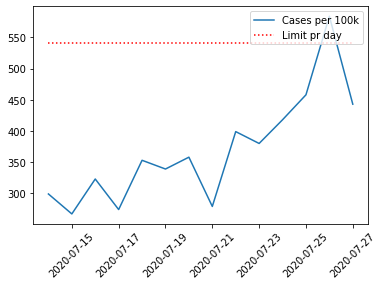

In [98]:
import matplotlib.pyplot as plt

ctry = eu.loc[eu['iso_code'] == iso]

max_per_day = 20 * ctry['population'].iloc[0] / 100000 / 14

plt.plot(ctry['date'], ctry['new_cases'], label='Cases per 100k')
plt.hlines(max_per_day, ctry['date'].min(), ctry['date'].max(), linestyles='dotted', colors='red', label='Limit pr day')
plt.legend(loc='upper right')
plt.xticks(rotation=45)

In [99]:
ctry

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,pr_100k
23988,POL,Europe,Poland,2020-07-14,38190.0,299.0,1576.0,5.0,1009.073,7.900,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.790031
23989,POL,Europe,Poland,2020-07-15,38457.0,267.0,1588.0,12.0,1016.128,7.055,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.705479
23990,POL,Europe,Poland,2020-07-16,38780.0,323.0,1594.0,6.0,1024.663,8.534,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.853445
23991,POL,Europe,Poland,2020-07-17,39054.0,274.0,1605.0,11.0,1031.902,7.240,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.723975
23992,POL,Europe,Poland,2020-07-18,39407.0,353.0,1612.0,7.0,1041.229,9.327,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.932712
23993,POL,Europe,Poland,2020-07-19,39746.0,339.0,1618.0,6.0,1050.187,8.957,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.895721
23994,POL,Europe,Poland,2020-07-20,40104.0,358.0,1624.0,6.0,1059.646,9.459,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.945924
23995,POL,Europe,Poland,2020-07-21,40383.0,279.0,1627.0,3.0,1067.018,7.372,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.737186
23996,POL,Europe,Poland,2020-07-22,40782.0,399.0,1636.0,9.0,1077.560,10.543,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,1.054256
23997,POL,Europe,Poland,2020-07-23,41162.0,380.0,1642.0,6.0,1087.601,10.041,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,1.004053
